In [2]:
import numpy as np
import tt
from tt.amen import amen_solve
import matplotlib.pyplot as plt

# Diffusion equation
We need to solve the diffusion equation:

$\frac{\partial}{\partial t} c(x,t) - D \frac{{\partial}^2}{\partial x^2} c(x,t) = 0 $

With conditions $c(x, 0) = \frac{1}{\sqrt(2 \pi)} e^{\frac{x}{2}}$ and $c(5, t) = c(-5, t) = 0$.


## 1. Creating equation in TT-format

Our boundaries will be $[-5, 5] \times [0, 100]$

In [61]:
d = 10
START_X = -5
END_X = 5
START_t = 0
END_t = 100
shift = tt.qshift(d)
eye = tt.eye(2, d)
delta_x = (END_X - START_X) / (2 ** d)
delta_t = (END_t - START_t) / (2 ** d)
D = 10**(-5)

In [62]:
#Differential operator
dif_op = shift - shift.T
#Laplace operator
laplace = shift + shift.T - 2 * eye

In [63]:
def gauss_func(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2) 

In [65]:
#Matrix A and b
A =  1 / (2 * delta_x * 2 * delta_t) * tt.kron(dif_op, eye) + D / (delta_t**2 * delta_x**2) * tt.kron(eye, laplace)
right_part = np.zeros(2 ** (2 * d))
right_part[0:2**d] = gauss_func(np.linspace(-5, 5, 2**d), 0, 1)
right_part[-2**d:] = 1 / (END_X - START_X)
b = tt.vector(right_part.reshape([2] * (2*d), order='F'))

[-5.         -4.99022483 -4.98044966 ...  4.98044966  4.99022483
  5.        ]


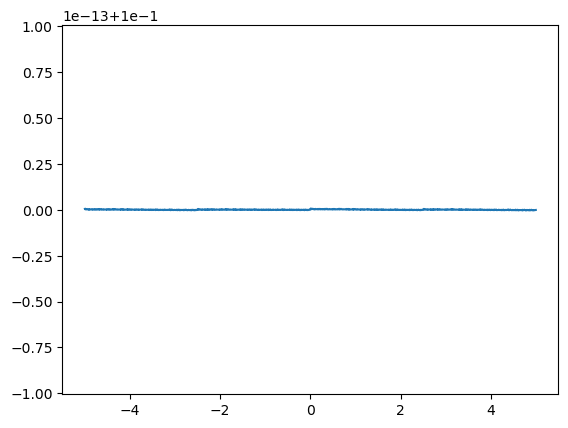

In [69]:
X = np.linspace(-5, 5, 2**d)
print(X)
plt.plot(X, b.full().flatten('F')[-2**d:])
plt.show()

## Equation solution

We will use AMEN algorithm to solve diffusion equation

In [70]:
result = amen_solve(A, b, b, 1e-20)

amen_solve: swp=1, max_dx= 2.320E+01, max_res= 2.320E+01, max_rank=14
amen_solve: swp=2, max_dx= 3.018E-01, max_res= 2.112E+00, max_rank=16
amen_solve: swp=3, max_dx= 2.890E-01, max_res= 1.493E+00, max_rank=19
amen_solve: swp=4, max_dx= 2.126E-01, max_res= 1.726E+00, max_rank=21
amen_solve: swp=5, max_dx= 1.602E-01, max_res= 1.255E+00, max_rank=24
amen_solve: swp=6, max_dx= 4.144E-02, max_res= 5.298E-01, max_rank=27
amen_solve: swp=7, max_dx= 4.876E-03, max_res= 9.084E-02, max_rank=30
amen_solve: swp=8, max_dx= 1.393E-03, max_res= 2.245E-02, max_rank=30
amen_solve: swp=9, max_dx= 6.242E-05, max_res= 1.241E-03, max_rank=34
amen_solve: swp=10, max_dx= 6.575E-05, max_res= 7.752E-04, max_rank=38
amen_solve: swp=11, max_dx= 7.672E-06, max_res= 1.620E-04, max_rank=41
amen_solve: swp=12, max_dx= 9.514E-07, max_res= 2.027E-05, max_rank=41
amen_solve: swp=13, max_dx= 1.128E-07, max_res= 2.307E-06, max_rank=38
amen_solve: swp=14, max_dx= 4.835E-08, max_res= 4.039E-07, max_rank=41
amen_solve: swp

In [71]:
C = result.full().flatten('F')
C.shape

(1048576,)

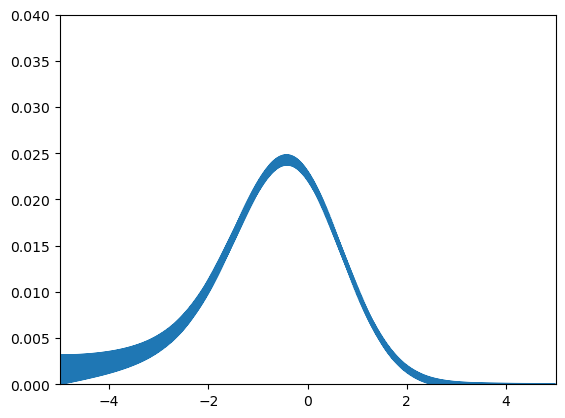

In [83]:
X = np.linspace(-5, 5, 2**d)
i=0
plt.plot(X, -C[2**d * i: 2**d * (i+1)])
plt.axis([-5, 5, 0, 0.04])
plt.show()

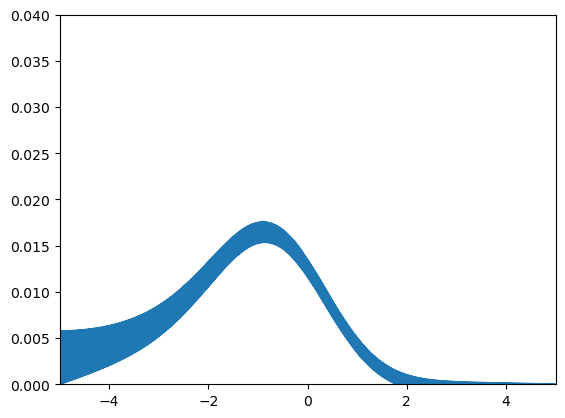

In [84]:
X = np.linspace(-5, 5, 2**d)
i=1
plt.plot(X, -C[2**d * i: 2**d * (i+1)])
plt.axis([-5, 5, 0, 0.04])
plt.show()

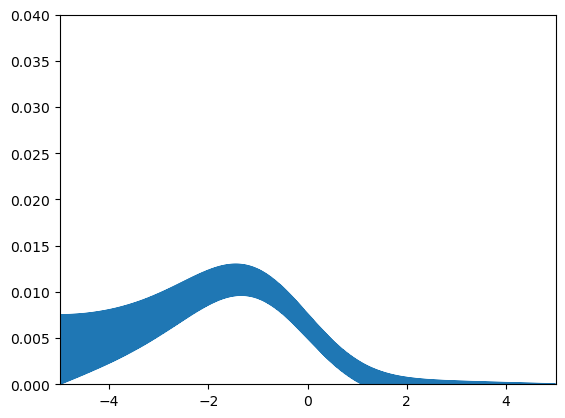

In [85]:
X = np.linspace(-5, 5, 2**d)
i=2
plt.plot(X, -C[2**d * i: 2**d * (i+1)])
plt.axis([-5, 5, 0, 0.04])
plt.show()

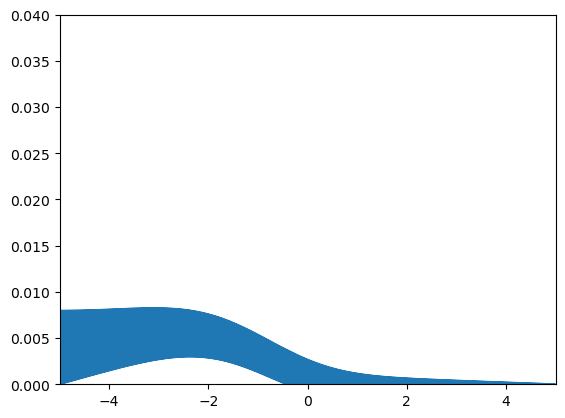

In [89]:
X = np.linspace(-5, 5, 2**d)
i=4
plt.plot(X, -C[2**d * i: 2**d * (i+1)])
plt.axis([-5, 5, 0, 0.04])
plt.show()

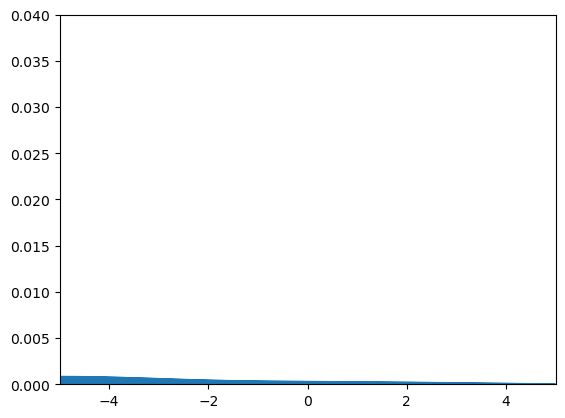

In [88]:
X = np.linspace(-5, 5, 2**d)
i=10
plt.plot(X, -C[2**d * i: 2**d * (i+1)])
plt.axis([-5, 5, 0, 0.04])
plt.show()

## Results:
As we see, we, definetly, have gaussian distribution at the begining which trasforms into a horizontal line close to zero in a period of time. 